Cleaning & Preprocessing the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

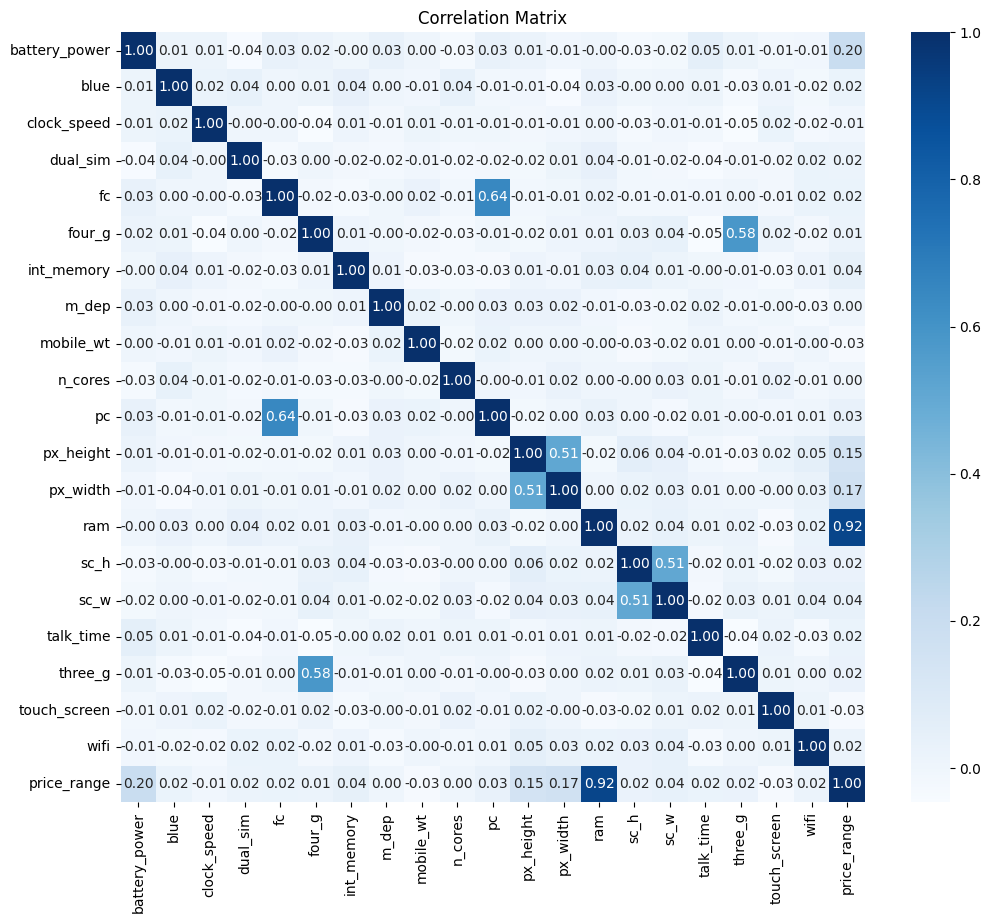

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data=pd.read_csv(r'C:\Users\pak7y\OneDrive\Desktop\Projects\Machine\train (1).csv')
data.head()
data.info()
data.isnull().sum()
data.duplicated().sum()
data.describe()
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
x=data.iloc[: , :-1]
y=data['price_range']
x
y
sc=StandardScaler()
xScaled=sc.fit_transform(x)

pc & fc 0.64
three_g & four_g 0.58
price_range & ram 0.92
px_width & px_height 0.51
sc_w & sc_h 0.51

Importing Necessary Libraries

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn import tree

TEST - TRAIN split

In [287]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

Training & Plotting Decision Tree with depth = 4

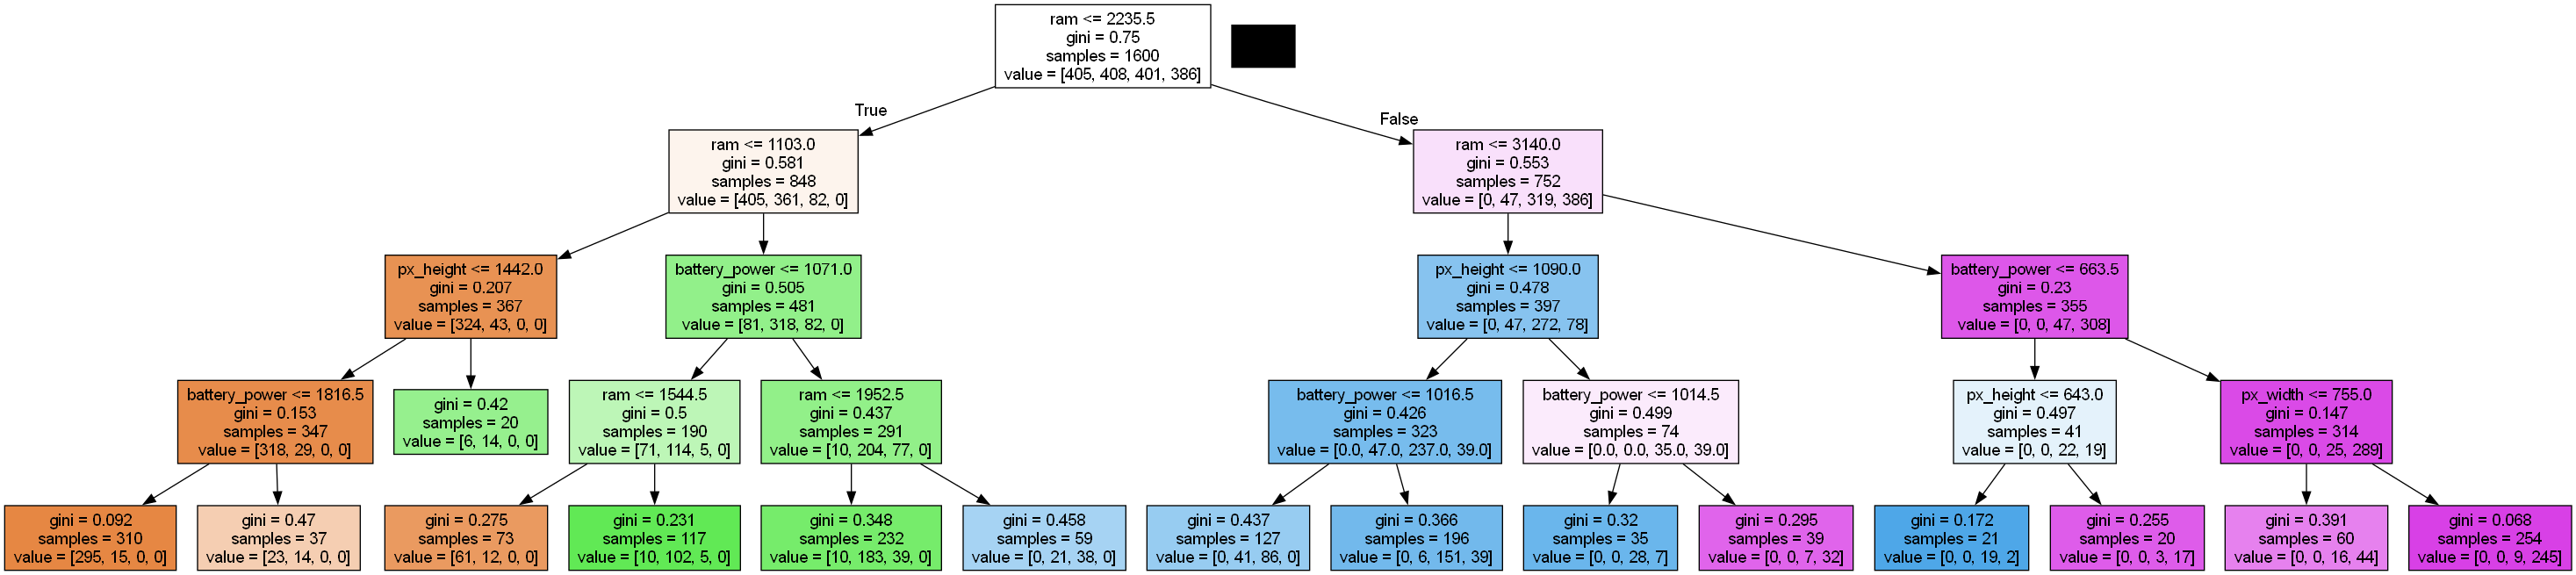

In [288]:
clftree = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clftree.fit(x_train, y_train)

y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [289]:
train_acc=accuracy_score(y_train, clftree.predict(x_train))
test_acc=accuracy_score(y_test, clftree.predict(x_test))
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 0.84
Testing Accuracy: 0.80


In [290]:
print(confusion_matrix(y_test, clftree.predict(x_test)))
print(classification_report(y_test, clftree.predict(x_test)))

[[89  6  0  0]
 [12 60 20  0]
 [ 0 12 76 11]
 [ 0  0 20 94]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        95
           1       0.77      0.65      0.71        92
           2       0.66      0.77      0.71        99
           3       0.90      0.82      0.86       114

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.80       400



## Overall Model Performance:
- The model achieved an accuracy of 80%, which shows reasonable performance but highlights room for improvement.

## Class-wise Performance:

- Class 0 (Low Price):  
Precision: 0.88, Recall: 0.94, F1-Score: 0.91  
The model performs very well for this class, with only 6 misclassifications out of 95 samples.  

- Class 1 (Medium Price):  
Precision: 0.77, Recall: 0.65, F1-Score: 0.71  
The model struggles to identify Class 1, misclassifying 20 samples into Class 2 and 12 samples into Class 0.  

- Class 2 (High Price):  
Precision: 0.66, Recall: 0.77, F1-Score: 0.71  
While the recall for Class 2 is good (77%), the precision is relatively low (66%), indicating the model misclassifies some other classes as Class 2.  

- Class 3 (Very High Price):  
Precision: 0.90, Recall: 0.82, F1-Score: 0.86  
Misclassifications primarily occur between Class 3 and Class 2.  

## Observations on Misclassifications:
- Most misclassifications occur between adjacent price classes,  
For example, between Class 1 and Class 2 or Class 2 and Class 3, indicating that the boundaries between these categories are not perfectly clear.
- Class 0 and Class 3 perform the best, indicating that lower and higher price ranges have clearer boundaries based on the features.

### We can further improve the accuracy by increasing the depth but it will result in making the tree harder to read:

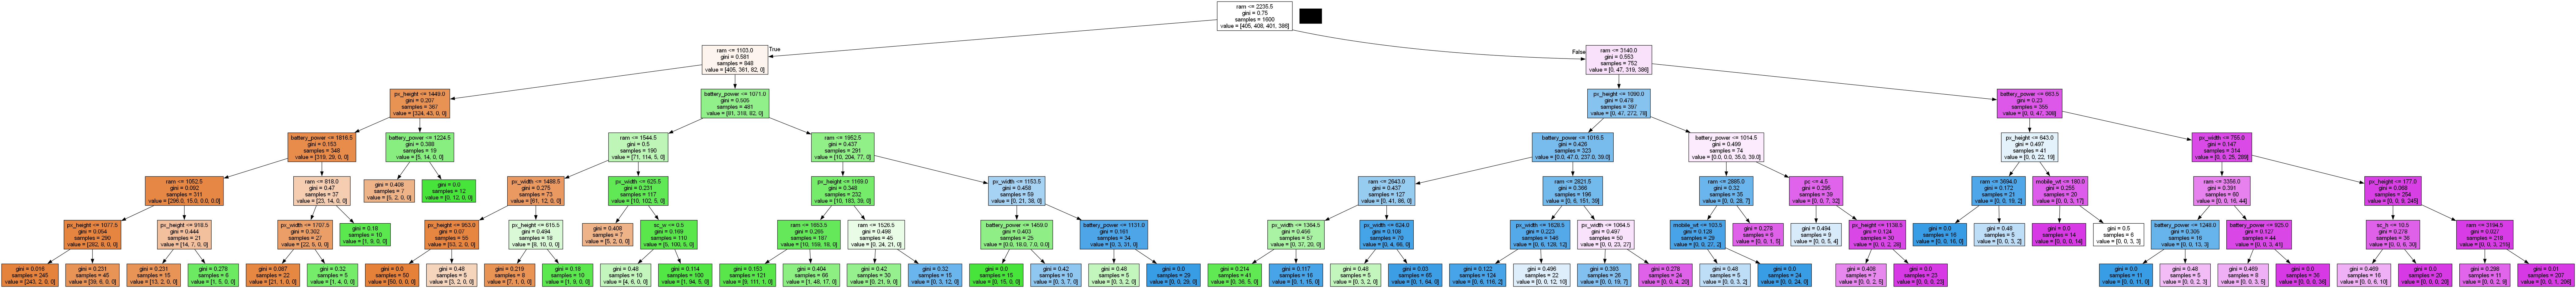

In [294]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=6, min_samples_split=16)
clftree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [295]:
train_acc=accuracy_score(y_train, clftree2.predict(x_train))
test_acc=accuracy_score(y_test, clftree2.predict(x_test))
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 0.91
Testing Accuracy: 0.85


In [296]:
print(confusion_matrix(y_test, clftree2.predict(x_test)))
print(classification_report(y_test, clftree2.predict(x_test)))

[[ 86   9   0   0]
 [  6  74  12   0]
 [  0  12  77  10]
 [  0   0  12 102]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.78      0.80      0.79        92
           2       0.76      0.78      0.77        99
           3       0.91      0.89      0.90       114

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



## Overall Model Performance:
- The accuracy of the model on the test data is 85%, which indicates a good level of performance.
- The model is able to classify most of the price ranges correctly but struggles slightly with specific classes.

## Class-wise Performance:
- Class 0 (Low Price):  
Precision: 0.93, Recall: 0.91, F1-Score: 0.92  
The model performs very well here, with only 9 misclassifications out of 95 samples.  

- Class 1 (Medium Price):  
Precision: 0.78, Recall: 0.80, F1-Score: 0.79  
Slight misclassifications occur, likely between classes 1 and 2 (medium to higher price).  

- Class 2 (High Price):  
Precision: 0.76, Recall: 0.79, F1-Score: 0.77  
Misclassifications are mainly observed between Class 2 and Class 3, suggesting the model struggles to separate higher price ranges.  

- Class 3 (Very High Price):  
Precision: 0.92, Recall: 0.89, F1-Score: 0.90  
The model performs well for this class, with 13 misclassifications into Class 2.  

## Observations on Misclassifications:
- Most misclassifications occur between adjacent price classes,  
For example, between Class 1 and Class 2 or Class 2 and Class 3, indicating that the boundaries between these categories are not perfectly clear.
- Class 0 and Class 3 perform the best, indicating that lower and higher price ranges have clearer boundaries based on the features.

# Insights from the Decision Tree Visualization:- 
- RAM is the most critical feature for predicting price ranges.
- Battery power and screen resolution further refine the classification splits.
- Gini index decreases down the tree, indicating reduced impurity and better separation of classes.